In [ ]:
# CS194-26 (CS294-26): Project 1 starter Python code

In [54]:
# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
from skimage import transform, filters
import skimage.io as skio

In [70]:
# name of the input file
imname = 'data/tobolsk.jpg'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)

# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(np.int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

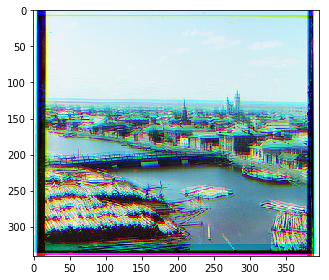

In [71]:
show_og()

In [ ]:
r.shape

In [ ]:
def crop_top(image, pixels):
    return image[pixels:]
def crop_bottom(image, pixels):
    return image[:-pixels]
def crop_all(image, pixels):
    temp = crop_top(image, pixels)
    return crop_bottom(temp, pixels)
    

#monastery
b = crop_all(b, 20)
g = crop_all(g, 20)
r = crop_all(r, 20)

In [72]:
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

#Sum of Squared Differences (SSD)
def SSD(x, y):
    return np.sum(np.sum((x-y)**2))

def align_ssd(x, y):
    min_diff =  100000
    applied_i = 0;
    applied_j = 0;
    for i in range(-50,50):
        for j in range (-50, 50):
            ri = np.roll(x, i, axis = 0)
            rj = np.roll(ri, j, axis = 1)
            ssd = SSD(rj, y)
            if (ssd < min_diff):
                applied_i = i
                applied_j = j
                min_diff = ssd
    print(applied_i)
    print(applied_j)
    print(min_diff)
    return np.roll(np.roll(x, applied_i, axis = 0), applied_j, axis = 1)
            
            
            

ag = align_ssd(g, b)
ar = align_ssd(r, b)
# create a color image
im_out = np.dstack([ar, ag, b])

3
2
4982.687750865052
6
3
8244.945774702037


In [ ]:
#normalized cross-correlation (NCC)
def normalize(z):
    return z - np.mean(z)

def NCC(x, y):
    nx = normalize(x)
    ny = normalize(y)
    normsum = np.sum(x * y)
    sqrtvar = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))
    
    return normsum/(sqrtvar) 

def align_ncc(x, y):
    max_diff =  -1
    applied_i = 0;
    applied_j = 0;
    for i in range(-15,15):
        for j in range (-15, 15):
            ri = np.roll(x, i, axis = 0)
            rj = np.roll(ri, j, axis = 1)
            ncc = NCC(rj, y)
            if (ncc > max_diff):
                applied_i = i
                applied_j = j
                max_diff = ncc
    print(applied_i)
    print(applied_j)
    print(max_diff)
    return np.roll(np.roll(x, applied_i, axis = 0), applied_j, axis = 1)
            
            
            

ag = align_ncc(g, b)
ar = align_ncc(r, b)
# create a color image
im_out = np.dstack([ar, ag, b])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


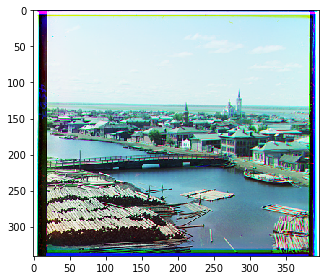

In [73]:
    fname = 'outputs/sdd_tobolsk.jpg'
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()

In [ ]:
#normalized cross-correlation (NCC)
def normalize(z):
    return z - np.mean(z)

def NCC(x, y):
    nx = normalize(x)
    ny = normalize(y)
    normsum = np.sum(x * y)
    sqrtvar = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))
    
    return normsum/(sqrtvar) 

def align_ncc_pyramid(x, y, vert, hor):
    max_diff =  -1
    applied_i = 0;
    applied_j = 0;
    for i in range(vert - 5,vert + 5):
        for j in range (hor - 5, hor + 5):
            ri = np.roll(x, i, axis = 0)
            rj = np.roll(ri, j, axis = 1)
            ncc = NCC(rj, y)
            if (ncc > max_diff):
                applied_i = i
                applied_j = j
                max_diff = ncc
    return(applied_i, applied_j)
            
def align_ncc_pyramid_base(x, y):
    max_diff =  -1
    applied_i = 0;
    applied_j = 0;
    for i in range(-15,15):
        for j in range (-15, 15):
            ri = np.roll(x, i, axis = 0)
            rj = np.roll(ri, j, axis = 1)
            ncc = NCC(rj, y)
            if (ncc > max_diff):
                applied_i = i
                applied_j = j
                max_diff = ncc
    return(applied_i, applied_j)

In [ ]:
def pyramid(x, y, n, stacks):
    if n == stacks:
        return align_ncc_pyramid_base(x, y)
    else:
        x = sk.transform.rescale(x, 0.75)
        y = sk.transform.rescale(y, 0.75)
        i, j = pyramid(x, y, n + 1, stacks)
        i = int(1.5 * i)
        j = int(1.5 * j))
        return align_ncc_pyramid(x, y, i, j)
    

In [ ]:
#main
import numpy as np
import skimage as sk
from skimage import transform, filters
import skimage.io as skio

# name of the input file
imname = 'castle.tif'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)

# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(np.int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]
print(b.shape)
b, g, r = autocrop(b, g, r)
print(b.shape)
im_out = align()
save(im_out)

In [ ]:
def autocrop(b, g, r):
    #monastery
    b_i = autocrop_get_i(b)
    g_i = autocrop_get_i(g)
    r_i = autocrop_get_i(r)
    
    top_i = np.max([b_i[0],g_i[0],r_i[0]])
    bottom_i = np.max([b_i[1],g_i[1],r_i[1]])
    left_i = np.max([b_i[2],g_i[2],r_i[2]])
    right_i = np.max([b_i[3],g_i[3],r_i[3]])

    return  b[top_i:-bottom_i, left_i:-right_i], g[top_i:-bottom_i, left_i:-right_i], r[top_i:-bottom_i, left_i:-right_i]
    
    
    
    

In [ ]:
def align():
    stacks = 0
    if height > 500:
        stacks = int(np.log2(height)) - 8
    print("stacks: " + str(stacks))



    ig, jg = pyramid(g, b, 0, stacks)
    ag = np.roll(np.roll(g, ig, axis = 0), jg, axis = 1)

    ir, jr = pyramid(r, b, 0, stacks)
    ar = np.roll(np.roll(r, ir, axis = 0), jr, axis = 1)

    # create a color image
    im_out = np.dstack([ar, ag, b])
    return im_out

In [ ]:
def save(im_out):
    # save the image
    fname = 'out_fname.jpg'
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()

    im_out_og = np.dstack([r, g, b])
    skio.imshow(im_out_og)
    skio.show()

In [9]:
def save_og(im_out, imname):
    # save the image
    fname = 'outputs/original/og_' + imname[:-4] + ".jpg"
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()

In [18]:
def save_basic(im_out, imname):
    # save the image
    fname = 'outputs/pyramid_only/po_' + imname[:-4] + ".jpg"
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()

In [ ]:

def autocrop_get_i(image):
    
    image = filters.roberts(image)
    
    max_border_vert = image.shape[0] // 15
    max_border_hor = image.shape[1] // 25
    
    #rb wants the biggest negative
    #want the cut off to be a big positive change (black to color)
    top =  np.array([np.sum(image[i] - image[i-1]) for i in range(1,max_border_vert)])
    bottom = np.array([np.sum(image[-i] - image[-i-1]) for i in range(1,max_border_vert)])
    left = np.array([np.sum(image[:,i] - image[:,i-1]) for i in range(1,max_border_hor)])
    right = np.array([np.sum(image[:,-i] - image[:,-i-1]) for i in range(1,max_border_hor)])
    
    #print("top")
    top_i = get_i(top)
    #print("bottom")
    bottom_i = get_i(bottom)
    #print("left")
    left_i = get_i(left)
    #print("right")
    right_i = get_i(right)
        
            
    return top_i,bottom_i,left_i,right_i

In [ ]:
def get_i(arr):
    ind = 0
    #print(arr)
    #print("# < - 80: " + str(np.sum(arr < -80)))
    count = np.sum(arr < -20)
    for i in range(count):
        ind = np.argmin(arr)
        arr[ind] = 100
    #print('select i: ' + str(ind))
    return ind

In [51]:
#main
import numpy as np
import skimage as sk
from skimage import transform, filters
import skimage.io as skio


#normalized cross-correlation (NCC)
def normalize(z):
    return z - np.mean(z)

def NCC(x, y):
    nx = normalize(x)
    ny = normalize(y)
    normsum = np.sum(x * y)
    sqrtvar = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))
    
    return normsum/(sqrtvar) 

#ncc used for pyramid context
def align_ncc_pyramid(x, y, vert, hor):
    max_diff =  -1
    applied_i = 0;
    applied_j = 0;
    for i in range(vert - 5,vert + 5):
        for j in range (hor - 5, hor + 5):
            ri = np.roll(x, i, axis = 0)
            rj = np.roll(ri, j, axis = 1)
            ncc = NCC(rj, y)
            if (ncc > max_diff):
                applied_i = i
                applied_j = j
                max_diff = ncc
    return(applied_i, applied_j)
         
#the base method used in the pyramid - also used for smaller images
def align_ncc_pyramid_base(x, y):
    max_diff =  -1
    applied_i = 0;
    applied_j = 0;
    for i in range(-15,15):
        for j in range (-15, 15):
            ri = np.roll(x, i, axis = 0)
            rj = np.roll(ri, j, axis = 1)
            ncc = NCC(rj, y)
            if (ncc > max_diff):
                applied_i = i
                applied_j = j
                max_diff = ncc
    return(applied_i, applied_j)

#searches images from coarse to fine grain
def pyramid(x, y, n, stacks):
    if n == stacks:
        return align_ncc_pyramid_base(x, y)
    else:
        x = sk.transform.rescale(x, 0.75)
        y = sk.transform.rescale(y, 0.75)
        i, j = pyramid(x, y, n + 1, stacks)
        i = int(1.5 * i)
        j = int(1.5 * j)
        return align_ncc_pyramid(x, y, i, j)
    
#uses the roberts filter to autocrop images
def autocrop(b, g, r):
    #monastery
    b_i = autocrop_get_i(b)
    g_i = autocrop_get_i(g)
    r_i = autocrop_get_i(r)
    
    top_i = np.max([b_i[0],g_i[0],r_i[0]])
    bottom_i = np.max([b_i[1],g_i[1],r_i[1]])
    left_i = np.max([b_i[2],g_i[2],r_i[2]])
    right_i = np.max([b_i[3],g_i[3],r_i[3]])

    return  b[top_i:-bottom_i, left_i:-right_i], g[top_i:-bottom_i, left_i:-right_i], r[top_i:-bottom_i, left_i:-right_i]
    
    
#apply the ncc and pyramid methods to the proper channels, then  stack them
def align(b, g, r):
    
    stacks = 0
    height = np.floor(b.shape[0] / 3.0).astype(np.int)
    if height > 500:
        stacks = int(np.log(height) / np.log(1.5)) - 10
    print("stacks: " + str(stacks))

    ig, jg = pyramid(g, b, 0, stacks)
    print()
    ag = np.roll(np.roll(g, ig, axis = 0), jg, axis = 1)

    ir, jr = pyramid(r, b, 0, stacks)
    ar = np.roll(np.roll(r, ir, axis = 0), jr, axis = 1)

    # create a color image
    im_out = np.dstack([ar, ag, b])
    print("Displacement(x, y): R(" + str(ir) + ", " + str(jr) + "), G(" + str(ig) + ", " + str(jg) + "), B(0, 0)")
    return im_out

#save the new stacked image
def save(im_out, imname):
    # save the image
    fname = 'outputs/auto_crop/ac_' + imname[:-4] + ".jpg"
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()
    
#get the amount need to crop each photo
def autocrop_get_i(image):
    
    image = filters.sobel(image)
    
    #set abritary boundary for cropping 
    max_border_vert = image.shape[0] // 15
    max_border_hor = image.shape[1] // 15 
    
    #get the difference between each  row or column
    top =  np.array([np.sum(image[i] - image[i-1]) for i in range(1,max_border_vert)])
    bottom = np.array([np.sum(image[-i] - image[-i-1]) for i in range(1,max_border_vert)])
    left = np.array([np.sum(image[:,i] - image[:,i-1]) for i in range(1,max_border_hor)])
    right = np.array([np.sum(image[:,-i] - image[:,-i-1]) for i in range(1,max_border_hor)])
    
    #want the cut off to be a big positive change (black to color)
    top_i = get_i(top)
    bottom_i = get_i(bottom)
    left_i = get_i(left)
    right_i = get_i(right)
        
            
    return top_i,bottom_i,left_i,right_i

def get_i(arr):
    ind = 0

    count = np.sum(arr < -20)
    
    #get the most recent biggest change in color
    #this is useful for when photos have both a black and white border
    for i in range(count):
        ind = np.argmin(arr)
        arr[ind] = 100
    return ind

fisherman.jpg
stacks: 0



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Displacement(x, y): R(10, 0), G(4, 2), B(0, 0)


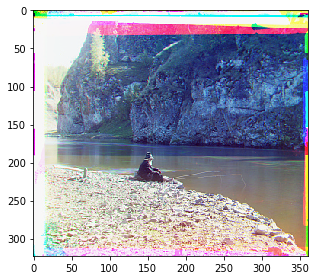

church.jpg
stacks: 0



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Displacement(x, y): R(8, 0), G(4, 0), B(0, 0)


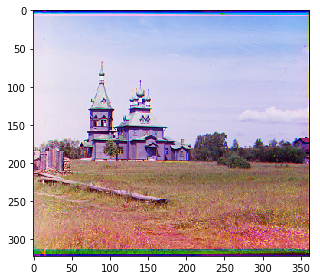

 old_gates.jpg
stacks: 0



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Displacement(x, y): R(9, 0), G(2, 2), B(0, 0)


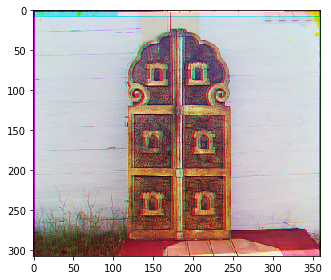

In [76]:
    image_names = ["fisherman.jpg", "church.jpg", " old_gates.jpg"]    
    for image_name in image_names:
        
        # name of the input file
        imname = image_name
        print(imname)

        # read in the image
        im = skio.imread("data/" + str(imname))

        # convert to double (might want to do this later on to save memory)    
        im = sk.img_as_float(im)

        # compute the height of each part (just 1/3 of total)
        height = np.floor(im.shape[0] / 3.0).astype(np.int)

        # separate color channels
        b = im[:height]
        g = im[height: 2*height]
        r = im[2*height: 3*height]

        b, g, r = autocrop(b, g, r)

        im_out = align(b, g, r)
        save(im_out, imname)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


cathedral.jpg


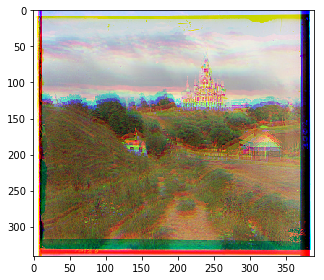

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


monastery.jpg


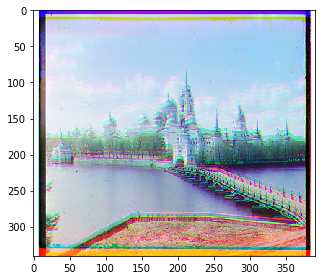

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


tobolsk.jpg


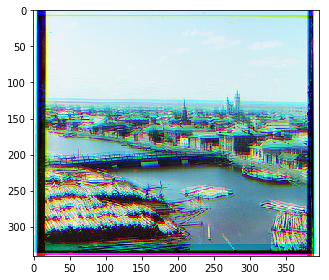

castle.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


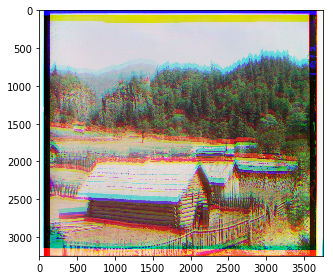

icon.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


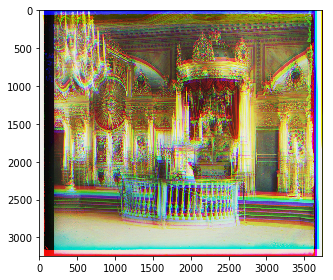

lady.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


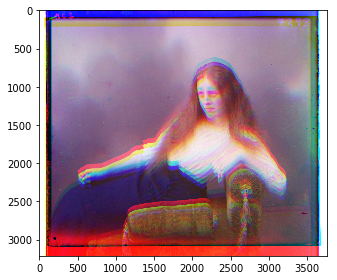

self_portrait.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


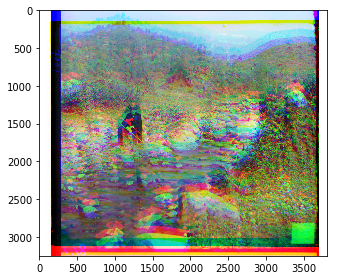

melons.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


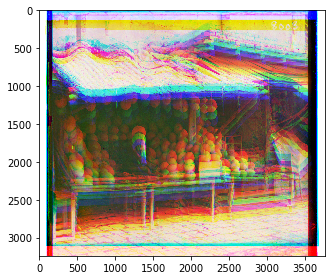

three_generations.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


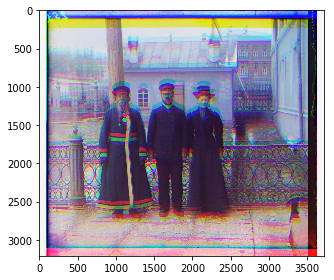

emir.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


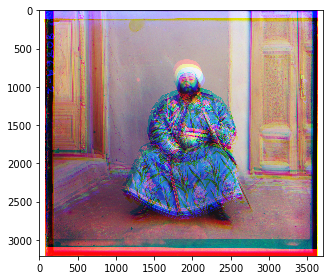

onion_church.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


train.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


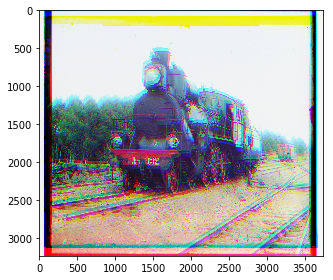

harvesters.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


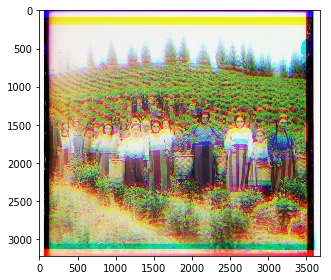

workshop.tif


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


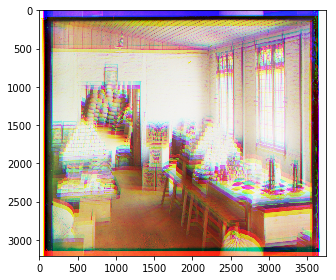

In [14]:
#save all the original photos
image_names = ["cathedral.jpg", "monastery.jpg", "tobolsk.jpg", "castle.tif", "icon.tif", "lady.tif", "self_portrait.tif", "melons.tif", "three_generations.tif", "emir.tif", "onion_church.tif", "train.tif", "harvesters.tif", "workshop.tif"]
    
for image_name in image_names:
        
        # name of the input file
        imname = image_name
        print(imname)

        # read in the image
        im = skio.imread(imname)

        # convert to double (might want to do this later on to save memory)    
        im = sk.img_as_float(im)

        # compute the height of each part (just 1/3 of total)
        height = np.floor(im.shape[0] / 3.0).astype(np.int)

        # separate color channels
        b = im[:height]
        g = im[height: 2*height]
        r = im[2*height: 3*height]

        im_out_og = np.dstack([r, g, b])
        save_og(im_out_og, imname)

fisherman.jpg
stacks: 0



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Displacement(x, y): R(10, 0), G(4, 1), B(0, 0)


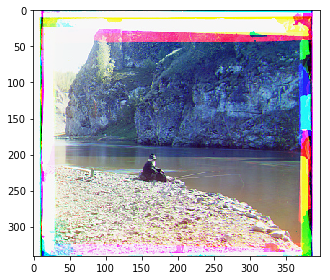

church.jpg
stacks: 0



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Displacement(x, y): R(8, 0), G(4, 0), B(0, 0)


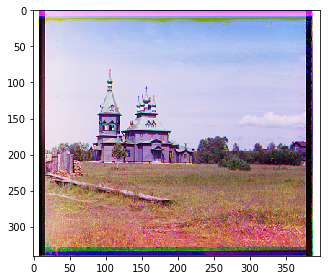

 old_gates.jpg
stacks: 0



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Displacement(x, y): R(10, -1), G(9, -1), B(0, 0)


In [75]:
image_names = ["fisherman.jpg", "church.jpg", " old_gates.jpg"]
    
for image_name in image_names:
        
        # name of the input file
        imname = image_name
        print(imname)

        # read in the image
        im = skio.imread("data/" + str(imname))

        # convert to double (might want to do this later on to save memory)    
        im = sk.img_as_float(im)

        # compute the height of each part (just 1/3 of total)
        height = np.floor(im.shape[0] / 3.0).astype(np.int)

        # separate color channels
        b = im[:height]
        g = im[height: 2*height]
        r = im[2*height: 3*height]

        im_out = align(b, g, r)
        save_basic(im_out, imname)